# pill 4 - A gentle introduction to supervised learning

<div class = "alert alert-danger" style = "border-radius:10px">**DEPENDENCIES:** `ipywidgets` dependency.</div>

## 1. Disectioning machine learning methods

In order to be able to learn, any algorithm has to define at least three components:

+ **The model class/hypothesis space** defines the family of mathematical models that will be used. The target decision boundary will be approximated from one element of this space. For example, we can consider the class of linear models. In this case our decision boundary will be a line if the problem is defined in ${\bf R}^2$ and the model class is the space of all posible lines in ${\bf R}^2$. 

    Model classes define the geometric properties of the decision function. There are different taxonomies but the most well-known are the *families* of **linear** and **non-linear** models. These families usually depend on some parameters. And the solution to a learning problem is the selection of a particular set of parameters, i.e. the selection of an instance model from the model class space. The model class space is also called **hypothesis space**.

    The selection of the best model will depend on our problem and what we want to obtain from the problem. The primary goal in learning is usually achieving the minimum error/maximum performance. But according to what else we want from the algorithm we will find different algorithms. Other common desirable properties are interpretability, behavior in front of missing data, fast training, etc.


+ **The problem model** formalizes and encodes the desired properties of the solution. In many cases this formalization takes the form of an optimization problem. In it most basic instantiation, the problem model can be the **minimization of an error function**. The error function measures the difference between our model and the target one. Informally speaking, in a classification problem it measures how "irritated" we are when our model misses the right label of a training sample. For example, in classification the ideal error function is the **0-1 loss**. This function takes value $1$ when we incorrectly classify a training sample and zero otherwise. In this case, it can be intrepreted that one is only irritated by "one unit of irritation" when one sample is misclassified.

    Problem model can also be used to impose other constraints on our solution, such as finding a smooth approximation, small complexity model, sparse solution, etc.
    
    
+ **The learning algorithm** is an optimization/search method or algorithm that given a model class fits it to the training data according to the error function. According to the nature of our problem there are many different algorithms. In general, we are talking about finding the minimum error approximation or maximum probable model. In those cases, if the problem is convex/quasi-convex we will typically use first or second order methods (i.e. gradient descent, coordinate descent, Newton's method, Interior Point methods, etc). Other searching techniques such as genetic algorithms or monte-carlo techniques can be used if we do not have access to the derivatives of the objective function.


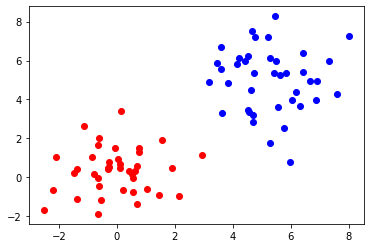

In [1]:
%matplotlib inline
#from sklearn import 
import numpy as np
#Create some data
X = np.concatenate([1.25*np.random.randn(40,2),5+1.5*np.random.randn(40,2)]) 
y = np.concatenate([np.ones((40,1)),-np.ones((40,1))])

#Visualize
import matplotlib.pyplot as plt
plt.scatter(X[0:40,0],X[0:40,1],color='r')
plt.scatter(X[40:,0],X[40:,1],color='b');

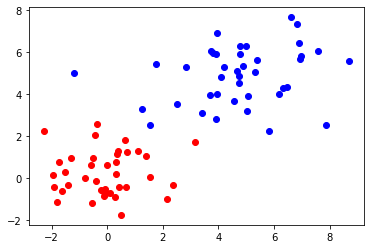

interactive(children=(FloatSlider(value=0.0, description='w0', max=10.0, min=-10.0), FloatSlider(value=0.0, de…

In [2]:
#from sklearn import 
import numpy as np
#Create some data
X = np.concatenate([1.25*np.random.randn(40,2),5+1.5*np.random.randn(40,2)]) 
y = np.concatenate([np.ones((40,1)),-np.ones((40,1))])

#Visualize
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact

def human_learning_algorithm(X,y):
    
    plt.scatter(X[0:40,0],X[0:40,1],color='r')
    plt.scatter(X[40:,0],X[40:,1],color='b')
    #plt.scatter(X[0:40,0],X[0:40,1],color='r')
    #plt.scatter(X[40:,0],X[40:,1],color='b')    
    delta = 0.025
    xx = np.arange(-5.0, 10.0, delta)
    yy = np.arange(-5.0, 10.0, delta)
    XX, YY = np.meshgrid(xx, yy)
    Xf = XX.flatten()
    Yf = YY.flatten()
    sz=XX.shape
    data = np.concatenate([Xf[:,np.newaxis],Yf[:,np.newaxis]],axis=1);

    def hml_display(w0,w1,offset):
        w=np.array([w0,w1])
        w.shape=(2,1)
        #Evaluate the model for a given weight
        Z = data.dot(w)+offset
        Z.shape=sz
        plt.scatter(X[0:40,0],X[0:40,1],color='r')
        plt.scatter(X[40:,0],X[40:,1],color='b')
        plt.imshow(Z, interpolation='bilinear', origin='lower', extent=(-5,10,-5,10),alpha=0.3, vmin=-15, vmax=15)
        plt.contour(XX,YY,Z,[0])
        fig = plt.gcf()
        fig.set_size_inches(9,9)
   
    #Ipython 2.0      
    interact(hml_display, w0=(-10.,10.), w1=(-10.,10.), offset=(-20.,40.));
    #Ipython 1.1 back compatibility
    #w0=-10. #-10.,10.
    #w1=-10. #-10.,10.
    #offset=-20. #-20.,40.
    #hml_display(w0,w1,offset) 

    
human_learning_algorithm(X,y)



<div class = "alert alert-success" style = "border-radius:10px">**QUESTION:** Describe the process you used for fitting the classifier
</div>

<div class = "alert alert-info" style="border-radius:10px">**Some notes on the learning process**
<p>
The main goal of any learning process is to achive the maximum predictive power (*accuracy*). This is minimize the error. However, there are three other important properties we usually desire our models to have:

<p>
<li> **Simplicity** - how much fiddling do we need for the method to work? Can I modify it to handle the particularities of my problem?
<li> **Speed** - How long does it take to train a reliable model? (training time) Can I use it in embedded and real time applications? (testing time), How long do I have to wait for processing my 1YB (yottabyte - 1e24 Bytes) dataset?
<li> **Interpretability** - Why did it make this predictions?

<p>
It happens that accuracy trades off with all the rest of the desirable properties. 
</div>

In general, we can represent the problem of supervised machine learning as in the following scheme:

<img src = "./files/learning_problem-eps-converted-to.jpg" width = 400px>

## 2. First steps into a model: Linear regression

Consider a two dimensional problem such as the following. 

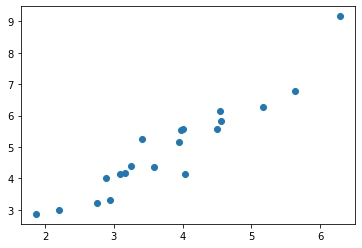

In [3]:
import numpy as np
np.random.seed(2)
x = 4+np.random.normal(size=(20,1))
y = 0.5 + 1.2*x + 0.5*np.random.normal(size=(20,1))

%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(x,y)

In every problem we have to decide the **model class**, the **cost function**, and the **learning/searching algorithm**.

In this problem we could decide to use as **model class** the set of *linear models*, i.e. $$\mathcal{H}(w_0,w_1) = \hat{y} = w_1 x + w_0,$$
where $w_1$ and $w_0$ are the parameters of the model. 

Our **cost function** could be the *mean least squares* function, i.e. $$\mathcal{L}(y_i,\hat{y}_i) = \frac{1}{N}\sum_{i=0}^N (y_i - \hat{y}_i)^2$$, where $\hat{y}$ is the predicted value.

Using these two elements we can model the problem of learning as:

$$
\begin{align}
\underset{w_0,w_1}{\text{minimize}}&& \frac{1}{N}\sum_{i=0}^N (y_i - (w_1x_i + w_0))^2.
\end{align}
$$



Our last component is the way of solving this problem. Fortunately for us we know about *optimization* and *numerical linear algebra*. Thus we can proceed in different directions. 

Let us start with using a very simple and intuitive idea:

<ol>
<li>Start with a random point, ${\bf w}^0$.</li>
<li>Change the parameters in such a way that we reduce the cost function</li>
$$\mathcal{L}({\bf w}^{t})\leq \mathcal{L}({\bf w}^{t-1})$$
<li>Repeat until we can not reduce the cost function</li>
</ol>
    

Let us refine the process
<ol>
<li>Start with a random point, ${\bf w}^0$.</li>
<li>Select a descent direction $\Delta {\bf w}$ and a step size $\eta$ (this last can be selected by line search).</li>
<li>Update the parameters:</li>
$$ {\bf w}^{t} = {\bf w}^{t-1} + \eta \Delta {\bf w}$$

<li>Repeat 2-3 until the stoping criterion is met (This can be a certain number of iterations or a desired error tolerance).</li>
</ol>

The most well known technique in this kind of techniques is **Steepest descent** or **Gradient descent**, where $\Delta {\bf w} = -\nabla_{\bf w} \mathcal{L}$.

In order to solve the problem we have to compute the gradient of the loss function. We can easily derive the expression considering matrix calculus. Let us express the linear model as the inner product of the parameters and the data point. For the sake of simplicity consider an extended data example as 

$$\tilde{\bf x} = \left(\begin{matrix} 1\\ {\bf x} \end{matrix}\right)$$


thus

$$\hat{y} = \sum_{i=1}^d w_i x^{(i)} + w_0 = \sum_{i=0}^d w_i \tilde{x}^{(i)} = \tilde{\bf x}^T {\bf w}.$$

Moreover, given a data set with $N$ data points, where each one is stored as a column vector, we can define the design matrix as 

$${\bf X} = (x_1, \dots x_N).$$

then, the output of our model for the whole data set is a prediction vector defined as

$$\hat{\bf y} = \tilde{\bf X}^T {\bf w}.$$

The loss function can also be expressed as a matrix product,

$$\mathcal{L}(y_i,\hat{y}_i) = \frac{1}{N}\sum_{i=0}^N (y_i - \hat{y}_i)^2 = \frac{1}{N} ({\bf y}-\hat{\bf y})^T({\bf y}-\hat{\bf y})$$

Thus our problem can be rewriten as 

$$
\begin{align}
\underset{{\bf w}}{\text{minimize}}&& \frac{1}{N}({\bf y}-\tilde{\bf X}^T {\bf w})^T({\bf y}-\tilde{\bf X}^T {\bf w}).
\end{align}
$$

We can differentiate this expression with respect the vector ${\bf w}$, considering the following rule 

$$\partial (A B) = \partial(A) B= + (A \partial (B))^T.$$

then

$$\nabla_{\bf w} \mathcal{L} = - \frac{2}{N} \tilde{\bf X}({\bf y}-\tilde{\bf X}^T {\bf w}).$$

<div class = "alert alert-danger" style= "border-radius:10px"> **EXERCISE/QUIZ:** Code a basic gradient descent for the problem. What is the value obtained for $\eta=0.01$ and 50 iterations if we initialize the weights to $(0,0)$? (Write down your solution, it will be asked for in the quiz later).
</div>

In [13]:
#your code here
N = x.shape[0]
x_augmented = np.c_[np.ones((x.shape[0],1)),x].T

def gradient_descent(n_iter=50, learning_rate=0.01, objective_plot: bool = False):
    w = np.zeros((2,1))
    objective=np.zeros((n_iter,1))

    for i in range(n_iter):
        objective[i] = np.dot((y - np.dot(x_augmented.T, w)).T, (y-np.dot(x_augmented.T, w)))
        gradient = - 2 / N * np.dot(x_augmented, y-np.dot(x_augmented.T, w))
        w -= learning_rate * gradient
        
    return w, objective

w, objective = gradient_descent()

In [14]:
# Run this code to compute the value for the quiz

assert w.shape==(2,1), 'The shape of the answer must be (2,1)'

w_opt = np.array([[0.5],[1.2]])
d = np.sqrt(np.dot((w_opt-w).T,(w_opt-w)))
print('The distance between w* and the obtained w is: '+ str(d))

The distance between w* and the obtained w is: [[0.21755622]]


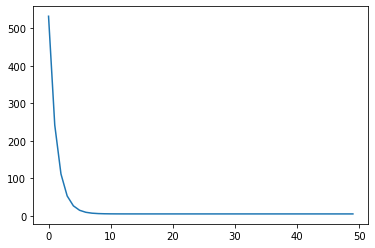

In [15]:
import matplotlib.pyplot as plt
plt.plot(objective);

<div class = "alert alert-danger" style= "border-radius:10px"> **EXERCISE/QUIZ:** Let us speed up the algorithm using a larger step. Solve the problem using the same code and $\eta=0.1$  and 100 iterations (starting point still the zero vector). What is the resulting value of the optimal parameters?
</div>

In [20]:
w, objective = gradient_descent(learning_rate=0.1, n_iter=100)
print("Optimal parameters", w)

Optimal parameters [[-3.72808661e+35]
 [-1.52232340e+36]]


<div class = "alert alert-danger" style= "border-radius:10px"> **EXERCISE/QUIZ:** Repeat the former exercise but compute the value of the objective function at each iteration and plot it. This is called "convergence plot".
</div>

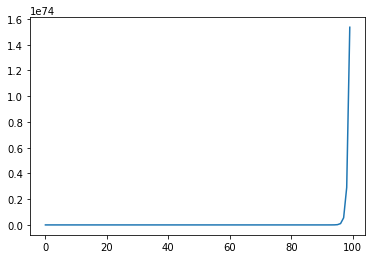

In [24]:
# Note it is increasing from the beggining even though the scale might fool us...

plt.plot(objective);

## Closed form solution for  least squares linear regression

Fortunately for us, this problem has a close form solution. As you may recall from optimization the condition for a point being an extremum is 

$$\nabla_{\bf w} \mathcal{L} = 0$$

In this problem, we can write

$$ - \frac{2}{N} \tilde{\bf X}({\bf y}-\tilde{\bf X}^T {\bf w}) = 0 $$

which, with simple manipulation gives us the following answer:

$${\bf w} = (\tilde{\bf X}\tilde{\bf X}^T)^{-1}\tilde{\bf X}{\bf y}$$

<div class = "alert alert-danger" style= "border-radius:10px"> **EXERCISE/QUIZ:** Repeat the former exercise using the analytic solution and write down the value for the quiz.
</div>

In [26]:
import numpy as np

x_augmented = np.c_[np.ones((x.shape[0],1)),x].T

w = np.dot(np.dot(np.linalg.pinv(np.dot(x_augmented, x_augmented.T)), x_augmented), y)

In [27]:
print("Optimal analytical parameters:", w)

Optimal analytical parameters: [[0.06909552]
 [1.28616382]]


In [28]:
# Run this code to compute the value for the quiz

assert w.shape==(2,1), 'The shape of the answer must be (2,1)'

w_opt = np.array([[0.5],[1.2]])
d = np.sqrt(np.dot((w_opt-w).T,(w_opt-w)))
print('The distance between w* and the obtained w is: '+ str(d))

The distance between w* and the obtained w is: [[0.43943472]]


## A comparison between both solvers

<table>
<tr><td>Iterative methods</td><td>Analytic solution</td></tr>
<tr><td>
<ul>
<li>Need to choose the learning rate $\eta$. </li>
<li>May be slow.</li>
<li>Each iteration is usually cheap.</li>
<li>Can be used with large data sizes.</li>
</ul>
</td><td>
<ul>
<li>Looks nicer</li>
<li>"No iterations are required"</li>
<li>Large computational cost. In the simplest case where we need matrix inversion, a naive method would need $O(n^3)$</li>
</ul>
</td>
</tr>
</table>